<a href="https://colab.research.google.com/github/HiuNgaiChan/3dSinGAN/blob/master/SPVGANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

learningRate = 0.00005
batch_size = 1000
single_data_size = 3
latent_size = 200
dataCSV = pd.read_csv('noNorm1000.csv')
dataTensor = torch.tensor(dataCSV.values).to(torch.float32)
dataset = torch.utils.data.DataLoader(dataTensor, batch_size=batch_size, shuffle=True)

class DNet(nn.Module):
    def __init__(self):
      super().__init__()
      self.net = nn.Sequential(
          nn.Linear(single_data_size, 128),
          nn.ReLU(),
          nn.Linear(128, 256),
          nn.ReLU(),
          nn.Linear(256, 128),
          nn.ReLU(),
          nn.Linear(128, 1),
          nn.Sigmoid()
      )


    def forward(self, x):

      return self.net(x)

class GNet(nn.Module):
    def __init__(self):
      super().__init__()
      self.net = nn.Sequential(
          nn.Linear(latent_size, 256),
          nn.ReLU(),
          nn.Linear(256, 512),
          nn.ReLU(),
          nn.Linear(512, 256),
          nn.ReLU(),    
          nn.Linear(256, single_data_size),
          nn.Tanh()
      )


    def forward(self, x):

      return self.net(x)

In [4]:
d = DNet()
g = GNet()
lossF = nn.BCELoss()

In [7]:
Epoch = 5000

optimizerD = optim.Adam(d.parameters(), lr=learningRate, betas = (0.5, 0.999))
optimizerG = optim.Adam(g.parameters(), lr=learningRate, betas = (0.5, 0.999))
realLabel2 = torch.tensor([0.9]).to(torch.float32)
fakeLabel2 = torch.tensor([0.1]).to(torch.float32)
realLabel = torch.ones([batch_size,1],dtype = torch.float32)
fakeLabel = torch.zeros([batch_size,1],dtype = torch.float32)

dlossList = []
glossList = []

print('start training...')


for epoch in range(Epoch):
  for batch in dataset:
    d.zero_grad()
    output = d(batch.view(batch_size,3))

    loss_real = lossF(output, realLabel)

    Z = torch.rand(batch_size, latent_size)
    output = d(g(Z))
    loss_fake = lossF(output, fakeLabel)
    d_loss = loss_real + loss_fake

    d_loss.backward()
    optimizerD.step()

    #Z = torch.rand(batch_size, latent_size)
    z = torch.rand(latent_size)
    g.zero_grad()
    output = d(g(Z))
    g_loss = lossF(output,realLabel)
    g_loss.backward()
    optimizerG.step()

  if epoch%10 == 0:
    dlossList.append(d_loss)
    glossList.append(g_loss)

  if epoch%100 == 0:
    print(epoch)
    print('d_loss: ' + str(d_loss) +' g_loss: ' + str(g_loss))
    with torch.no_grad():
      Z = torch.rand(200)
      print(g(Z))
print("finish training")

start training...
0
d_loss: tensor(1.4107, grad_fn=<AddBackward0>) g_loss: tensor(0.6288, grad_fn=<BinaryCrossEntropyBackward>)
tensor([0.9130, 0.8032, 0.5711])
100
d_loss: tensor(1.3870, grad_fn=<AddBackward0>) g_loss: tensor(0.6233, grad_fn=<BinaryCrossEntropyBackward>)
tensor([-0.6156, -0.2476,  0.5920])
200
d_loss: tensor(1.3562, grad_fn=<AddBackward0>) g_loss: tensor(0.7355, grad_fn=<BinaryCrossEntropyBackward>)
tensor([0.9646, 0.6952, 0.9728])
300
d_loss: tensor(1.3663, grad_fn=<AddBackward0>) g_loss: tensor(0.7326, grad_fn=<BinaryCrossEntropyBackward>)
tensor([0.4637, 0.7582, 0.5726])
400
d_loss: tensor(1.4336, grad_fn=<AddBackward0>) g_loss: tensor(0.6533, grad_fn=<BinaryCrossEntropyBackward>)
tensor([-0.0906,  0.4916,  0.7214])
500
d_loss: tensor(1.3768, grad_fn=<AddBackward0>) g_loss: tensor(0.7064, grad_fn=<BinaryCrossEntropyBackward>)
tensor([0.9135, 0.7980, 0.2056])
600
d_loss: tensor(1.3586, grad_fn=<AddBackward0>) g_loss: tensor(0.7507, grad_fn=<BinaryCrossEntropyBackwar

In [1]:
with torch.no_grad():
  Z = torch.rand(3,200)
  print(g(Z))

NameError: ignored

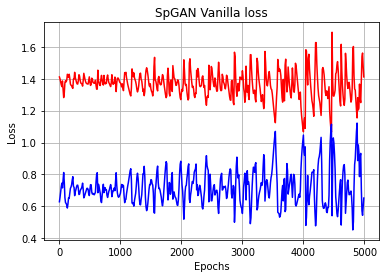

In [9]:
xis = np.arange(0,Epoch,10)
plt.plot(xis,dlossList,'r-', xis, glossList, 'b-')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('SpGAN Vanilla loss')
plt.grid(True)
plt.savefig("spganVanillaLoss.png")
plt.show()

In [ ]:
with torch.no_grad():
  fakeInput = torch.rand([1,3],dtype = torch.float32)
  realInput = torch.tensor([-9.17560291,8.07809353,10.00162411]).to(torch.float32)
  print(d(fakeInput))
  print(d(realInput))


tensor([[0.5017]])
tensor([0.4111])


In [10]:
import csv
import torch


with open("sCubeOne.csv", "w", newline="") as csvfile:
  xyzWriter = csv.writer(csvfile, delimiter=",")
  for i in range(1000):
    with torch.no_grad():
      Z = torch.rand(200)
      line = g(Z).tolist()
    xyzWriter.writerow(line)


In [11]:
import csv
import torch

for j in range(9):
  with open("sCube" + str(j) + ".csv", "w", newline="") as csvfile:
    xyzWriter = csv.writer(csvfile, delimiter=",")
    for i in range(1000):
      with torch.no_grad():
        Z = torch.rand(200)
        line = g(Z).tolist()
      xyzWriter.writerow(line)